## Final Project Submission

* Student name: Joyce Njuguna
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Problem


Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [20]:
#import all necessary packages

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import zipfile
import sqlite3

 # Read the datasets

 gross_data from 'data/bom.movie_gross.csv'

 info_data from 'data/tmdb.movies.csv'
 
 budget_data from'data/tn.movie_budgets.csv'
 


In [21]:
#create dataframe for data in "data/bom.movie_gross.csv"
gross_data = pd.read_csv('data/bom.movie_gross.csv')
gross_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
#create dataframe for data in "data/tmdb.movies.csv"
info_data= pd.read_csv('data/tmdb.movies.csv')
info_data.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
#create dataframe for data in "data/tn.movie_budgets.csv"
budget_data= pd.read_csv('data/tn.movie_budgets.csv')
budget_data.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


# EDA on budget_data

In [24]:
budget_data.shape

(5782, 6)

In [25]:
budget_data.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [26]:
budget_data.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [27]:
budget_data.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [28]:
budget_data.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [29]:
#converting production_budget to str
budget_data['production_budget'] = budget_data['production_budget'].astype(str)


In [30]:
budget_data[['domestic_gross' , 'worldwide_gross']] = budget_data[['domestic_gross' , 'worldwide_gross']].astype(str)

In [31]:
#function to remove "$"" and ","
def remove_characters(df, col):
 
      if col not in df.columns:
        raise ValueError(f"Column '{col}' does not exist in the DataFrame.")
      
      df[col]= df[col].str.replace('$', '', ).str.replace(',', '', regex=True)

      return df.head()
 #= string.replace('$', "").replace(',', "")


In [32]:
remove_characters(budget_data, 'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"


In [33]:
remove_characters(budget_data, 'domestic_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"


In [34]:
remove_characters(budget_data, 'worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [35]:
budget_data['production_budget'] = budget_data['production_budget'].astype(float)
budget_data['domestic_gross'] = budget_data['domestic_gross'].astype(float)
budget_data['worldwide_gross'] = budget_data['worldwide_gross'].astype(float)
budget_data.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [36]:
budget_data.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [37]:
budget_data.corr()

ValueError: could not convert string to float: 'Dec 18, 2009'

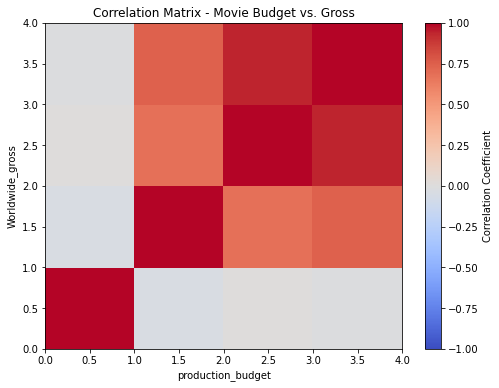

In [ ]:
# Heatmap to show corelation between budget and worldwide_gross

plt.figure(figsize=(8, 6))
correlation_matrix = budget_data.corr()
heatmap = plt.pcolor(correlation_matrix, vmin=-1, vmax=1, cmap='coolwarm')

# Add labels and title
plt.xlabel('production_budget')
plt.ylabel('Worldwide_gross')
plt.title('Correlation Matrix - Movie Budget vs. Gross')

# Add colorbar
plt.colorbar(label='Correlation Coefficient')
plt.show()

The above visualization can be utilized by film-makers for Budget justification: When requesting high budgets. It shows potential for strong domestic and international performance.

# EDA on info_data
info_data from 'data/tmdb.movies.csv'


In [ ]:
info_data.shape

(26517, 10)

In [ ]:
info_data.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [ ]:
info_data.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [ ]:
#explode info_data and store it in a variable "info_data_exploded"
info_data_exploded = info_data.explode('genre_ids')

info_data_exploded['genre_ids'] = info_data_exploded['genre_ids']
  # Count the occurrences of each genre ID
genre_counts = info_data_exploded['genre_ids'].value_counts()

info_data_exploded['genre_ids'] = info_data_exploded['genre_ids']
most_common_genre_id = genre_counts.max()

most_common_genre_id
print ("The most_common_genre_id is  ", most_common_genre_id, ".")


The most_common_genre_id is   3700 .


In [ ]:
info_data_exploded['popularity'].max()

80.773

In [ ]:

correlation = info_data_exploded.groupby('genre_ids')['popularity' , 'genre_ids'].corr()  
print(correlation)


<ipython-input-54-daad00b3fbc3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation = info_data_exploded.groupby('genre_ids')['popularity' , 'genre_ids'].corr()


                                          popularity
genre_ids                                           
[10402, 10749, 18]            popularity         1.0
[10402, 10749, 35, 18]        popularity         1.0
[10402, 10749, 35]            popularity         1.0
[10402, 10749]                popularity         1.0
[10402, 10751, 14, 10770, 35] popularity         NaN
...                                              ...
[99, 9648]                    popularity         1.0
[99, 99, 99]                  popularity         NaN
[99, 99]                      popularity         NaN
[99]                          popularity         1.0
[]                            popularity         1.0

[2477 rows x 1 columns]


In [ ]:
correlation_matrix = info_data_exploded.corr(method='spearman')
print(correlation_matrix)


              Unnamed: 0        id  popularity  vote_average  vote_count
Unnamed: 0      1.000000  0.839502    0.010893      0.096784   -0.086905
id              0.839502  1.000000   -0.178129      0.122218   -0.301755
popularity      0.010893 -0.178129    1.000000     -0.017260    0.853673
vote_average    0.096784  0.122218   -0.017260      1.000000   -0.010610
vote_count     -0.086905 -0.301755    0.853673     -0.010610    1.000000


In [ ]:
info_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The correlation_matrix above shows correlation between tha differnt columns in our dataset. It is observed that vote_count and popularity are highly correlated

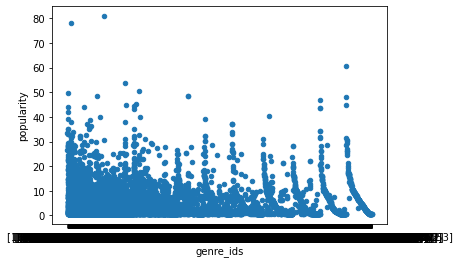

In [ ]:
#scatter plot to show correlation between genre-ids and popularity
scatter_plot = info_data_exploded.plot.scatter(x='genre_ids', y='popularity')

In [ ]:
#from scipy.stats import pearsonr
#pearsonr (info_data_exploded['genre_ids'], info_data_exploded['popularity'])

# Data cleaning and EDA on gross_data 
 
 gross_data is the dataframe containing data from the bom.movie_gross.csv file
 


In [ ]:
gross_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
gross_data.shape

(3387, 5)

In [ ]:
gross_data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
gross_data.dtypes


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [ ]:
#

In [ ]:
#drop rows with null values in the columns 'domestic_gross' & 'foreign_gross'
#gross_data.dropna(subset=['domestic_gross', 'foreign_gross'])

In [ ]:
gross_data.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

# Rottem tomatoes data 
rt_data from 'data/rt.movie_info.tsv'

In [ ]:

rt_data = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')
rt_data.head(3)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [ ]:
rt_data.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [ ]:
rt_data['currency'].value_counts()

$    340
Name: currency, dtype: int64

In [ ]:
remove_characters(rt_data, 'box_office')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [ ]:
rt_data['box_office']=rt_data['box_office'].astype (float)

In [ ]:
rt_data.dtypes

id                int64
synopsis         object
rating           object
genre            object
director         object
writer           object
theater_date     object
dvd_date         object
currency         object
box_office      float64
runtime          object
studio           object
dtype: object

In [ ]:
rt_data.shape

(1560, 12)

In [ ]:
rt_data.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

box_office has 1220/1560 empty values. It therefore isn't an ideal column to use for analysis.  The column ratings however has 3 null values. The rows with empty ratings can therefore be dropped without largerly affecting the dataset. 

In [ ]:
#drop rows with null values for column ('rating')
rt_data = rt_data.dropna(subset=['rating'])
rt_data.isnull().sum()

id                 0
synopsis          59
rating             0
genre              5
director         196
writer           446
theater_date     356
dvd_date         356
currency        1217
box_office      1217
runtime           27
studio          1063
dtype: int64

In [ ]:
ratings_counts = rt_data['rating'].value_counts()


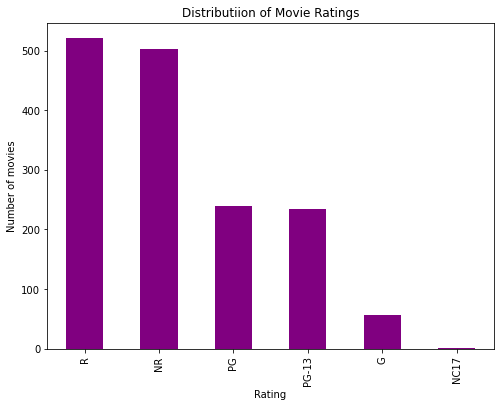

In [ ]:
#Create bar chart to show distribution of movie ratings.

plt.figure(figsize=(8, 6))
ratings_counts.plot(kind='bar', color='purple')
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.title('Distributiion of Movie Ratings')

plt.savefig('movie_rating_distribution.png')
plt.show()


Observation:
The r-rating is the most popular rating while G is the least count of movies

In [ ]:
rt_data['director'].value_counts()

Steven Spielberg              10
Clint Eastwood                 8
Yimou Zhang                    4
Barry Levinson                 4
Bruce Beresford                4
                              ..
Andrew Stanton|Mark Atkins     1
Robert Siodmak                 1
Barnet Kellman                 1
Andrew Chapman                 1
Joe Pytka                      1
Name: director, Length: 1125, dtype: int64

In [ ]:
#Directors who have directed G rated movies
G_directors = rt_data.loc[rt_data['rating']== 'G', ['director']]
G_directors.value_counts()

director                                               
Norman Jewison                                             2
Yasujiro Ozu                                               1
Charles Walters                                            1
Irving Lerner                                              1
Hayao Miyazaki                                             1
Gordon Douglas                                             1
Godfrey Reggio                                             1
Gillian Armstrong                                          1
George Miller                                              1
Garry Marshall                                             1
Frank Nissen                                               1
Eric Rohmer                                                1
Elliot Silverstein|Elliott Silverstein                     1
Casper Wrede|Caspar Wrede                                  1
Jacques Cluzaud|Jacques Perrin                             1
Burny Mattinson|Ron Clements|

# Working with sqlite databse


In [ ]:
conn= sqlite3.connect('data/im.db')



In [ ]:
# Get a cursor object
cursor = conn.cursor()

In [ ]:
#view all the tables in the db
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = cursor.fetchall()

# Print table names
print("Available tables:")
for table_name in table_names:
    print(table_name[0]) 

Available tables:
movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [43]:
movie_basics_df = pd.read_sql(''' SELECT * FROM movie_basics

''', conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Questions
Q1- what is the correlation between runtime_minutes and the average rating

Q2 - what is the correlation between Director and the average rating

In [49]:
ratings_df = pd.read_sql(''' SELECT * FROM movie_ratings

''', conn)
ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [50]:
directors_df = pd.read_sql(''' SELECT * FROM directors

''', conn)

directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [57]:
movie_basics_df.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [64]:
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [63]:
# join the the movie basics table and the ratings table using INNER JOIN
# Read the data into a DataFrame director_ratings
movie_info = pd.read_sql(
    '''SELECT *
FROM movie_basics AS d
INNER JOIN movie_ratings AS mr 
ON d.movie_id = mr.movie_id;
''', conn)

movie_info


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [67]:
movie_info['genres'].value_counts()

genres
Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: count, Length: 923, dtype: int64

In [112]:
movie_info_rating = movie_info['rating'] = ["High" if ((x >= 6) and (x <= 10)) 
                   else "Low" for x in movie_info.averagerating]

In [113]:
genres = movie_info.groupby(['genres','averagerating'])['movie_id'].count()

AttributeError: 'DataFrame' object has no attribute 'movie_info_rating'

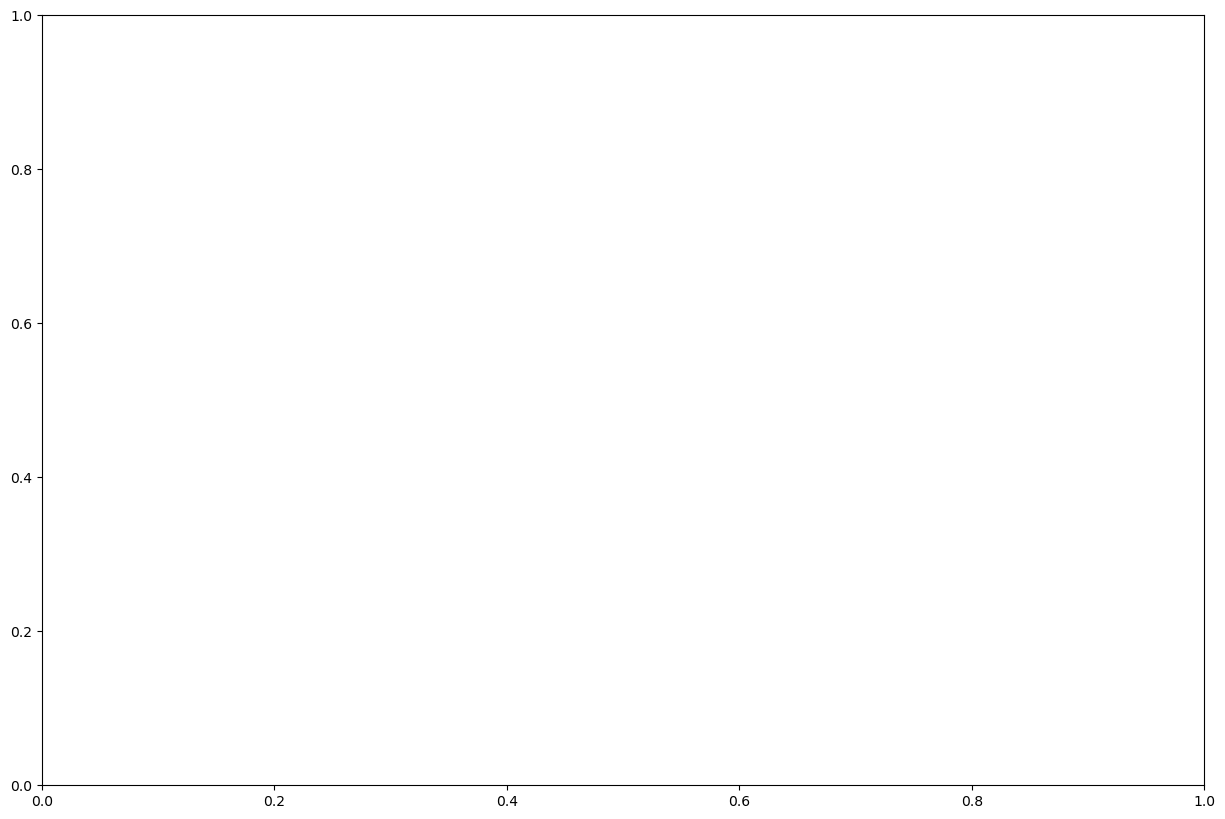

In [117]:

# Plotting a bar graph of most popular genres
fig, ax = plt.subplots(figsize=(15,10))

title = 'Top 10 Genres According to IMDB'
y_label = 'genres'
x_label = 'Genre'

genres.movie_info_rating.plot(kind='bar', color='purple')  # Set the color to purple
ax.set_title(title, fontsize=15)
ax.set_ylabel(y_label, fontsize=15)
ax.set_xlabel(x_label, fontsize=15)
plt.xticks(rotation=45, fontsize=12)

# Save the image in the Images directory
fig.savefig('Images/genres.png')

In [77]:
#replacing null values in the colunm runtime_minutes with the median
movie_info_median = movie_info['runtime_minutes'].median()
movie_info['runtime_minutes'] = movie_info['runtime_minutes'].fillna(movie_info_median)

In [78]:
#Confirm null values are no longer present in the column
movie_info['runtime_minutes'].isnull().sum()

0

In [82]:
correlation_matrix = movie_info[['runtime_minutes', 'averagerating']].corr()
correlation_matrix

,runtime_minutes,averagerating
runtime_minutes,1.000000,-0.006642
averagerating,-0.006642,1.000000


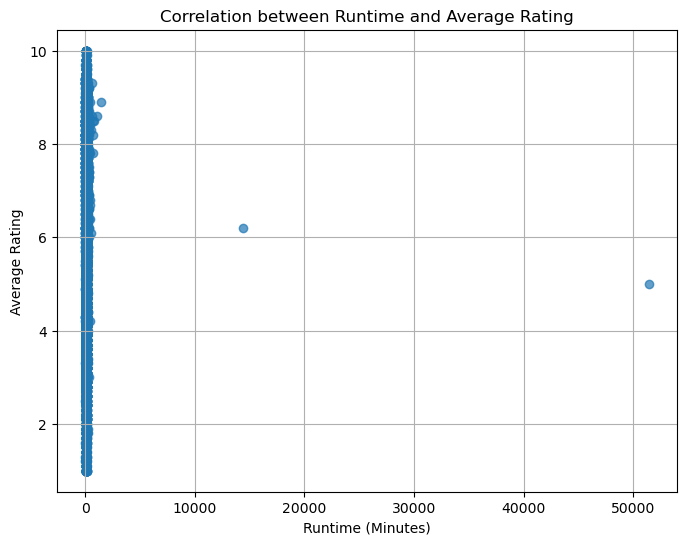

In [87]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(movie_info['runtime_minutes'], movie_info['averagerating'], alpha=0.7) 

# Add labels and title
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Average Rating')
plt.title('Correlation between Runtime and Average Rating')



# Show the plot
plt.grid(True)
plt.show()

This shows there is no corelation between average rating and runtime

In [68]:
movie_info.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
movie_id            object
averagerating      float64
numvotes             int64
dtype: object

In [55]:
directors_df['person_id'].value_counts()

person_id
nm6935209     238
nm2563700     190
nm1546474     185
nm3877467     180
nm3848412     144
             ... 
nm8950870       1
nm6461704       1
nm8963989       1
nm7094378       1
nm10123248      1
Name: count, Length: 109253, dtype: int64